Olá, Heury 

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Há erros nos testes usados. É algo importante que merece atenção. </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>



<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora. Espero que tenha ficado clara a diferença entre teste qui-quadrado e teste z de proporções.
Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# 1 - PRIORIZANDO HIPÓTESES


# 1.1 -  Visualizando e tratando os dados

In [31]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


In [32]:
# Carregando os datasets
hypotheses_df = pd.read_csv("/datasets/hypotheses_us.csv")
orders_df = pd.read_csv("/datasets/orders_us.csv")
visits_df = pd.read_csv("/datasets/visits_us.csv")

# Convertendo as colunas para o padrão snake_case
hypotheses_df.columns = hypotheses_df.columns.str.lower().str.replace(" ", "_")
orders_df.columns = orders_df.columns.str.lower().str.replace(" ", "_")
visits_df.columns = visits_df.columns.str.lower().str.replace(" ", "_")

# Exibindo as primeiras linhas dos dataframes para inspeção
print(hypotheses_df)
print()
print(orders_df)
print()
print(visits_df)


           hypothesis;reach;impact;confidence;effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
8  Launch a promotion that gives users discounts ...

      transactionid   visitorid        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8    

<div class="alert alert-block alert-info">
Vamos carregar o arquivo hypotheses_us.csv novamente, com delimitador ; <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não é bem um problema mas o delimitador não é , mas sim ;
</div>


In [33]:
# Carregando o arquivo hypotheses_us.csv novamente com delimitador ;
hypotheses_df = pd.read_csv("/datasets/hypotheses_us.csv", delimiter=";")

# Convertendo as colunas para o padrão snake_case
hypotheses_df.columns = hypotheses_df.columns.str.lower().str.replace(" ", "_")

# Exibindo as primeiras linhas do dataframe para inspeção
hypotheses_df


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [34]:
# Calculando o score ICE em hypotheses_df
hypotheses_df["ice"] = (hypotheses_df["impact"] * hypotheses_df["confidence"]) / hypotheses_df["effort"]

# Classificando em ordem decrescente
hypotheses_ice_sorted = hypotheses_df.sort_values(by="ice", ascending=False)

# Exibir os resultados ordenados por ICE
print("Prioridade ICE:")
print(hypotheses_ice_sorted[["hypothesis", "ice"]])

Prioridade ICE:
                                          hypothesis        ice
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [35]:
# Calculando o score RICE
hypotheses_df["rice"] = (hypotheses_df["reach"] * hypotheses_df["impact"] * hypotheses_df["confidence"]) / hypotheses_df["effort"]

# Classificando em ordem decrescente
hypotheses_rice_sorted = hypotheses_df.sort_values(by="rice", ascending=False)

# Exibindo os resultados ordenados por RICE
print("\nPrioridade RICE:")
print(hypotheses_rice_sorted[["hypothesis", "rice"]])


Prioridade RICE:
                                          hypothesis   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


<div class="alert alert-block alert-info">
Percebemos as seguintes mudanças entre as duas hipóteses:<br>
<b>"Add a subscription form" subiu do 3º lugar no ICE para o 1º lugar no RICE.</b><br>
Isso aconteceu porque essa hipótese tem um Reach alto (10), ou seja, impacta um grande número de usuários.<br>
No ICE, o Reach não é considerado, então ela ficou atrás de hipóteses com maior impacto e confiança.<br>
<br>
<b>"Launch a promotion that gives users discounts" caiu do 1º lugar no ICE para o 5º lugar no RICE.</b><br>
Isso ocorreu porque, apesar de ter um impacto e confiança altos, o Reach dessa hipótese é baixo (1).<br>
Como o RICE leva em conta quantas pessoas serão impactadas, a pontuação caiu significativamente.<br>
<br>
<b>"Add product recommendation blocks" subiu de 5º no ICE para 2º no RICE.</b><br>
Seu Reach é 8, tornando-a uma hipótese mais atrativa quando se considera o alcance do impacto.
Hipóteses com menor Reach perderam prioridade no RICE.<br>

<b>No ICE, a promoção com desconto parecia ser a melhor escolha.</b><br>
<b>No RICE, as hipóteses que impactam um número maior de usuários ficaram no topo da lista.</b><br><br>
 
ICE prioriza impacto e confiança em relação ao esforço, favorecendo ideias que têm alto impacto potencial independentemente do alcance.<br>
RICE adiciona o alcance de usuários (Reach) à equação, priorizando hipóteses que podem afetar um número maior de pessoas.<br>
Isso significa que:<br>

Se o objetivo for testar ideias com maior impacto potencial, o ICE pode ser mais adequado.<br>
Se o objetivo for escolher hipóteses que impactam mais pessoas, o RICE pode ser mais útil.<br>
.<a class="tocSkip"></a>
</div>

# 2 - ANÁLISE DO TESTE A/B

# 2.1 - Verificando e tratando os dados

In [36]:
# Convertendo a coluna 'date' para o formato de data
orders_df["date"] = pd.to_datetime(orders_df["date"])
visits_df["date"] = pd.to_datetime(visits_df["date"])

# Verificando se há valores duplicados
duplicated_orders = orders_df.duplicated().sum()
duplicated_visits = visits_df.duplicated().sum()

# Verificando se há visitantes que aparecem nos dois grupos (A e B)
duplicated_users = orders_df.groupby("visitorid")["group"].nunique().gt(1).sum()

# Verificando os valores ausentes
missing_values_orders = orders_df.isnull().sum()
missing_values_visits = visits_df.isnull().sum()

# Exibindo os resultados
print(f'Duplicatas em orders_df: {duplicated_orders}')
print(f'Duplicatas em visits_df: {duplicated_visits}')
print(f'Duplicatas em ambos os grupos: {duplicated_users}')
print(f'Valores ausentes em orders_df:\n {missing_values_orders}')
print(f'Valores ausentes em visits_df: {missing_values_visits}')

Duplicatas em orders_df: 0
Duplicatas em visits_df: 0
Duplicatas em ambos os grupos: 58
Valores ausentes em orders_df:
 transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
Valores ausentes em visits_df: date      0
group     0
visits    0
dtype: int64


<div class="alert alert-block alert-info">
Não há valores ausentes em orders_us.csv nem visits_us.csv.<br>
Não há linhas duplicadas em nenhum dos datasets.<br>
58 usuários aparecem em ambos os grupos (A e B), o que pode comprometer a integridade do teste A/B.<br>
Vamos remover os usuários que aparecem nos dois grupos para garantir um teste mais confiável. <br>
Depois, seguimos para a análise gráfica.
</div>

In [37]:
# Identificando os usuários que aparecem nos dois grupos
duplicated_users_list = orders_df.groupby("visitorid")["group"].nunique()
duplicated_users_list = duplicated_users_list[duplicated_users_list > 1].index

# Removendo esses usuários do dataset de pedidos
orders_cleaned_df = orders_df[~orders_df["visitorid"].isin(duplicated_users_list)]

# Verificando quantos usuários duplicados foram removidos
usuarios_removidos = orders_df.shape[0] - orders_cleaned_df.shape[0]

# Exibindo o número de usuários removidos e verificar o dataset atualizado
print(f'Usuários removidos: {usuarios_removidos}')
print(f'Novo tamanho do dataset: {orders_cleaned_df.shape[0]}')

Usuários removidos: 181
Novo tamanho do dataset: 1016


<div class="alert alert-block alert-info">
Foram removidos 181 registros de usuários que estavam presentes em ambos os grupos, garantindo que o teste A/B seja mais confiável. O novo dataset de pedidos agora contém 1016 registros.</div>

# 2.2 - Gerando os gráficos

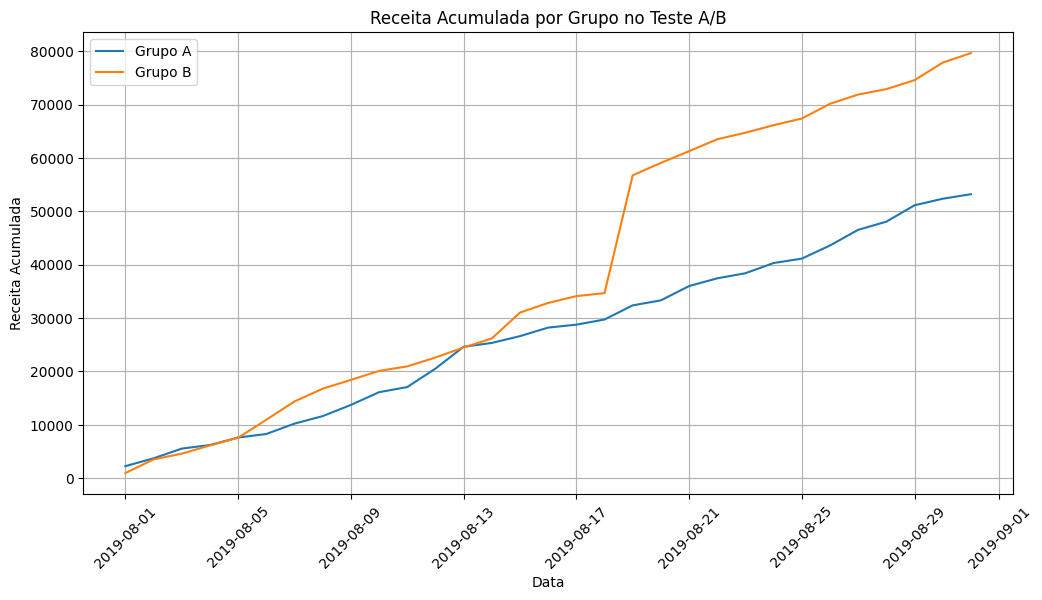

In [38]:
# Agregando os dados para receita acumulada
cumulative_revenue = orders_cleaned_df.groupby(["date", "group"])["revenue"].sum().reset_index()

# Criando uma versão cumulativa
cumulative_revenue["cumulative_revenue"] = cumulative_revenue.groupby("group")["revenue"].cumsum()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
for group in cumulative_revenue["group"].unique():
    subset = cumulative_revenue[cumulative_revenue["group"] == group]
    plt.plot(subset["date"], subset["cumulative_revenue"], label=f"Grupo {group}")

plt.xlabel("Data")
plt.ylabel("Receita Acumulada")
plt.title("Receita Acumulada por Grupo no Teste A/B")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Conclusões e conjecturas a partir do gráfico:</b> <br>
No início do teste, os grupos A e B apresentam um crescimento semelhante na receita acumulada.<br>
Em determinado momento (por volta de meados de agosto), o Grupo B apresenta um grande salto na receita acumulada, se distanciando significativamente do Grupo A.<br>
A partir desse ponto, o Grupo B mantém uma tendência de crescimento superior ao Grupo A até o final do período analisado.<br>
O aumento abrupto do Grupo B pode indicar um evento especial, como uma promoção, mudança de estratégia ou algum fator externo que influenciou as vendas do Grupo B.<br>
Os resultados indicam que o Grupo B teve um desempenho significativamente melhor, mas seria interessante analisar estatisticamente a significância dessa diferença para garantir que não seja apenas uma variação aleatória.<br></div>
    

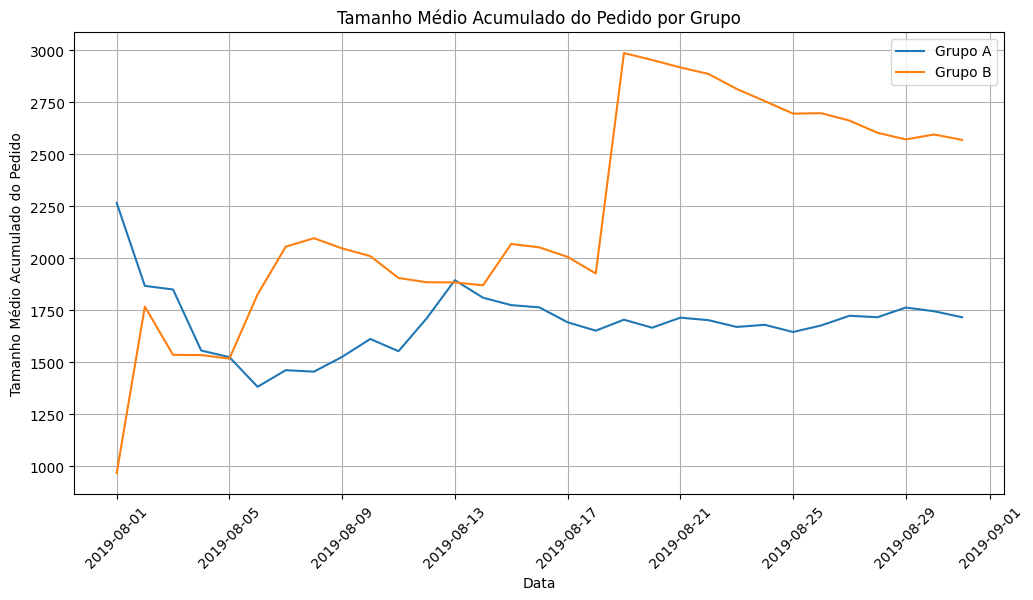

In [39]:
# Calculando o tamanho médio do pedido acumulado
cumulative_avg_order = cumulative_revenue.copy()
cumulative_avg_order["cumulative_avg_order"] = cumulative_avg_order["cumulative_revenue"] / cumulative_revenue.groupby("group")["revenue"].cumcount().add(1)

# Plotando o gráfico de Tamanho Médio Acumulado do Pedido por Grupo
plt.figure(figsize=(12, 6))
for group in cumulative_avg_order["group"].unique():
    subset = cumulative_avg_order[cumulative_avg_order["group"] == group]
    plt.plot(subset["date"], subset["cumulative_avg_order"], label=f"Grupo {group}")

plt.xlabel("Data")
plt.ylabel("Tamanho Médio Acumulado do Pedido")
plt.title("Tamanho Médio Acumulado do Pedido por Grupo")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
Nos primeiros dias, ambos os grupos apresentam grandes variações no tamanho médio do pedido, especialmente o Grupo A, que começa com um valor alto e depois cai.<br>
Após esse período inicial, os valores começam a estabilizar em torno de certas médias.<br>
Por volta da metade de agosto, o tamanho médio do pedido no Grupo B apresenta um grande salto, alcançando um pico acima de 3.000.<br>
Esse comportamento pode estar relacionado ao aumento abrupto da receita acumulada no Grupo B (observado no primeiro gráfico). Isso pode indicar um número pequeno de pedidos com valores muito altos.<br>
Se o Grupo B teve uma estratégia diferente (por exemplo, descontos progressivos para compras maiores ou promoções de pacotes), isso pode ter incentivado os clientes a gastarem mais por pedido.<br>
A grande variação no tamanho médio pode sugerir que um pequeno número de pedidos de alto valor influenciou a média do Grupo B.</div>

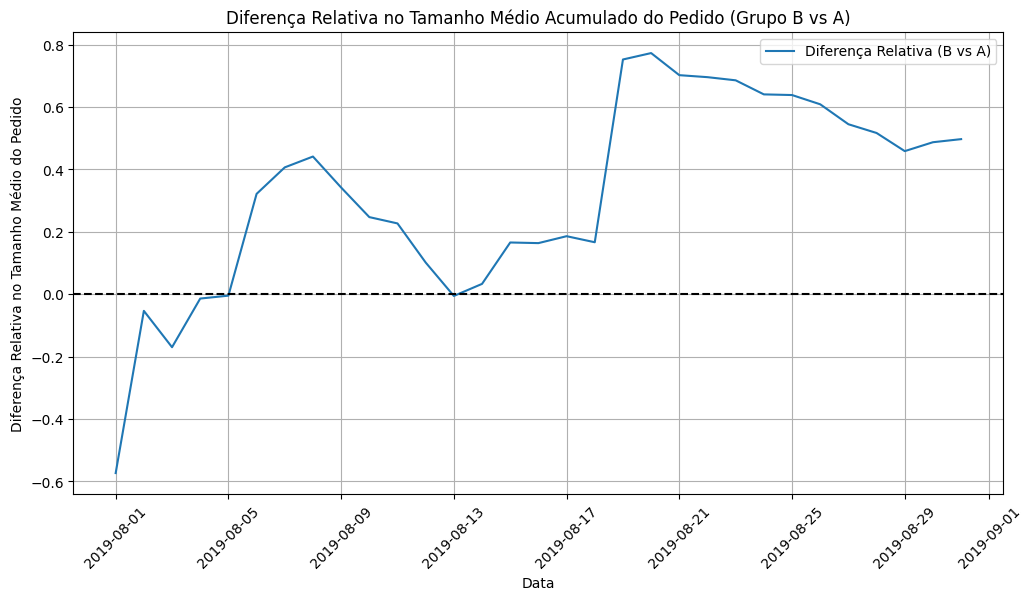

In [40]:
# Criando um DataFrame para comparar os grupos
cumulative_revenue_A = cumulative_avg_order[cumulative_avg_order["group"] == "A"][["date", "cumulative_avg_order"]]
cumulative_revenue_B = cumulative_avg_order[cumulative_avg_order["group"] == "B"][["date", "cumulative_avg_order"]]

# Renomeando as colunas para mesclar os DataFrames
cumulative_revenue_A = cumulative_revenue_A.rename(columns={"cumulative_avg_order": "cumulative_avg_A"})
cumulative_revenue_B = cumulative_revenue_B.rename(columns={"cumulative_avg_order": "cumulative_avg_B"})

# Juntando os dados com base na data
cumulative_comparison = pd.merge(cumulative_revenue_A, cumulative_revenue_B, on="date")

# Calculando a diferença relativa entre os grupos
cumulative_comparison["relative_difference"] = (cumulative_comparison["cumulative_avg_B"] / cumulative_comparison["cumulative_avg_A"]) - 1

# Plotando o gráfico da diferença relativa
plt.figure(figsize=(12, 6))
plt.plot(cumulative_comparison["date"], cumulative_comparison["relative_difference"], label="Diferença Relativa (B vs A)")

# Adicionando linha de referência em 0
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel("Data")
plt.ylabel("Diferença Relativa no Tamanho Médio do Pedido")
plt.title("Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs A)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
A partir do dia 5 de agosto, o Grupo B começa a superar o Grupo A na maior parte do tempo, apresentando valores positivos na diferença relativa.<br>
Apesar de algumas quedas temporárias, a diferença relativa volta a crescer e atinge um pico próximo a 80% em relação ao Grupo A por volta de 20 de agosto.<br>
Após atingir o pico, a diferença relativa começa a diminuir levemente, mas ainda se mantém consideravelmente acima do zero.<br>
Isso sugere que, embora o efeito tenha reduzido um pouco, os pedidos no Grupo B continuaram significativamente maiores do que no Grupo A até o final do teste.<br>
</div>

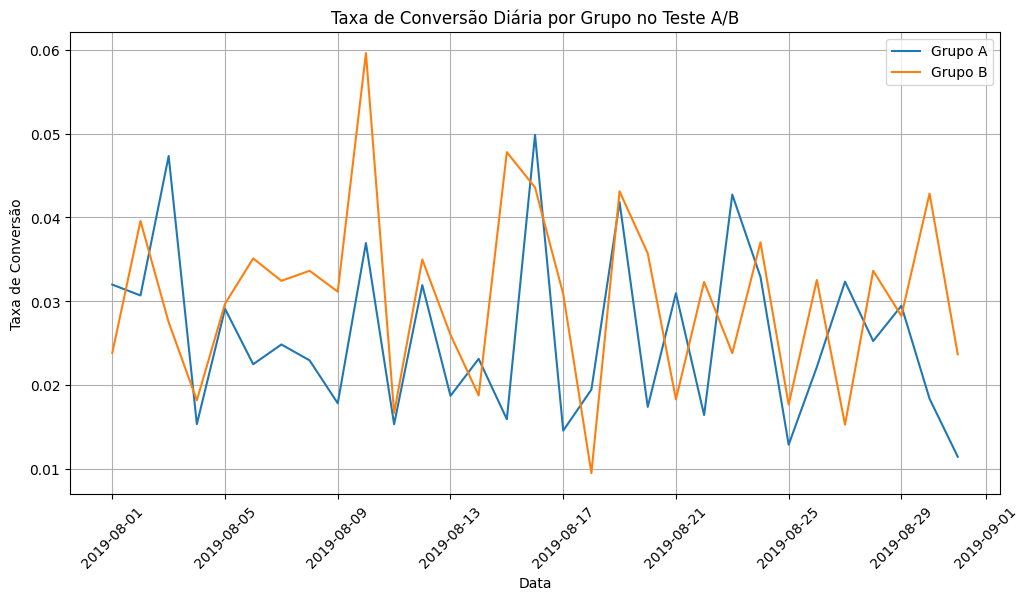

In [41]:
# Calculando a taxa de conversão como proporção de pedidos para visitas por dia
daily_orders = orders_cleaned_df.groupby(["date", "group"])["transactionid"].nunique().reset_index()
daily_orders = daily_orders.rename(columns={"transactionid": "orders"})

# Mesclando com os dados de visitas
conversion_data = pd.merge(daily_orders, visits_df, on=["date", "group"])
conversion_data["conversion_rate"] = conversion_data["orders"] / conversion_data["visits"]

# Plotando a taxa de conversão diária
plt.figure(figsize=(12, 6))
for group in conversion_data["group"].unique():
    subset = conversion_data[conversion_data["group"] == group]
    plt.plot(subset["date"], subset["conversion_rate"], label=f"Grupo {group}")

plt.xlabel("Data")
plt.ylabel("Taxa de Conversão")
plt.title("Taxa de Conversão Diária por Grupo no Teste A/B")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
Em alguns dias, o Grupo A supera o Grupo B, enquanto em outros o Grupo B tem melhor desempenho.<br>
Isso sugere que não há um padrão claro de superioridade de um grupo sobre o outro na taxa de conversão diária.<br>
As oscilações podem estar relacionadas a:<br>
<b>Baixo volume de tráfego diário:</b> Se o número de visitantes por dia for pequeno, qualquer pequena variação no número de conversões pode causar grandes mudanças na taxa diária.<br>
    <b>Fatores externos:</b> Promoções, feriados, mudanças no tráfego do site ou na publicidade podem ter influenciado os resultados de alguns dias.
<b>Distribuição desigual de visitantes:</b> Se o tráfego não foi distribuído de forma aleatória entre os grupos, um deles pode ter recebido um perfil de visitantes diferente, afetando a conversão.
</div>

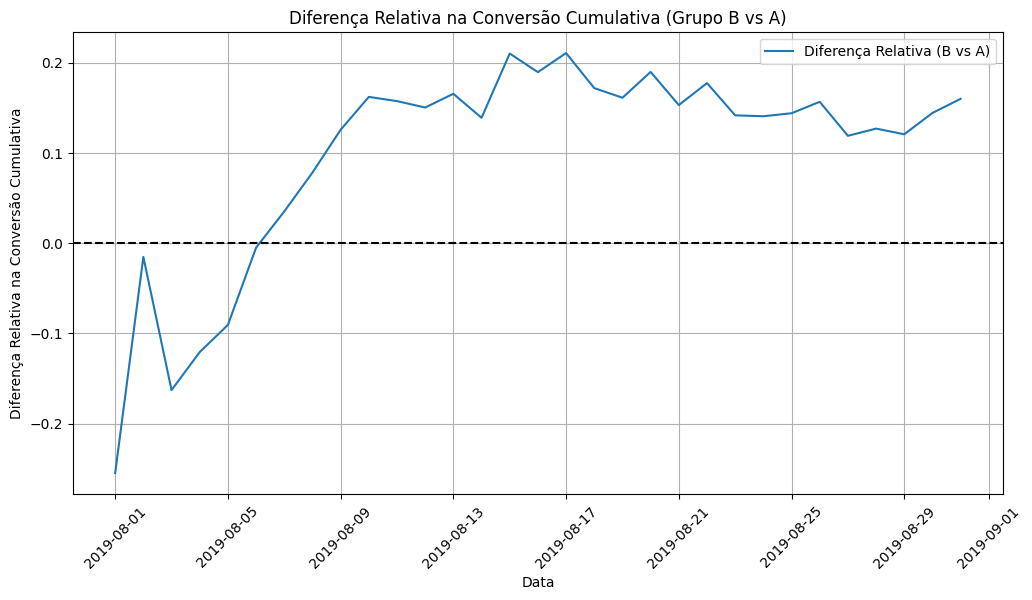

In [42]:
# Calculando a conversão acumulada por grupo 
cumulative_conversion = conversion_data.copy()
cumulative_conversion["cumulative_orders"] = cumulative_conversion.groupby("group")["orders"].cumsum()
cumulative_conversion["cumulative_visits"] = cumulative_conversion.groupby("group")["visits"].cumsum()
cumulative_conversion["cumulative_conversion_rate"] = cumulative_conversion["cumulative_orders"] / cumulative_conversion["cumulative_visits"]

# Aplicando np.logical_and() para selecionar os grupos
mask_A = np.logical_and(cumulative_conversion["group"] == "A", cumulative_conversion["cumulative_orders"] > 0)
mask_B = np.logical_and(cumulative_conversion["group"] == "B", cumulative_conversion["cumulative_orders"] > 0)

# Separando os grupos usando o filtro
cumulative_conversion_A = cumulative_conversion[mask_A][["date", "cumulative_conversion_rate"]].rename(columns={"cumulative_conversion_rate": "cumulative_A"})
cumulative_conversion_B = cumulative_conversion[mask_B][["date", "cumulative_conversion_rate"]].rename(columns={"cumulative_conversion_rate": "cumulative_B"})

# Mesclando os dados
cumulative_comparison = pd.merge(cumulative_conversion_A, cumulative_conversion_B, on="date")

# Calculando a diferença relativa entre os grupos
cumulative_comparison["relative_difference"] = (cumulative_comparison["cumulative_B"] / cumulative_comparison["cumulative_A"]) - 1

# Plotando o gráfico da diferença relativa
plt.figure(figsize=(12, 6))
plt.plot(cumulative_comparison["date"], cumulative_comparison["relative_difference"], label="Diferença Relativa (B vs A)")

# Adicionando linha de referência em 0
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel("Data")
plt.ylabel("Diferença Relativa na Conversão Cumulativa")
plt.title("Diferença Relativa na Conversão Cumulativa (Grupo B vs A)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
No início do teste, há fortes oscilações negativas e positivas, o que indica que os resultados eram ainda instáveis.<br>
Após alguns dias, a diferença relativa passa da linha de referência (0.0) e se mantém positiva (grupo B começa a se destacar).<br>
Por volta do dia 10 de agosto, a diferença relativa chega a um patamar de 15% a 22%, e apesar de pequenas oscilações, se mantém consistentemente positiva até o final do período analisado.<br>
Isso sugere que, a longo prazo, o Grupo B converteu melhor do que o Grupo A.<br>
A tendência positiva indica que o efeito não foi apenas aleatório, mas sim sustentado ao longo do tempo.<br>
Se essa diferença for estatisticamente significativa, a estratégia usada no Grupo B pode ser recomendada para aplicação geral.</div>

In [43]:
# Calculando o número de pedidos por usuário
orders_per_user = orders_cleaned_df.groupby("visitorid")["transactionid"].count()

# Calculando os percentis 95 e 99
percentile_95 = np.percentile(orders_per_user, 95)
percentile_99 = np.percentile(orders_per_user, 99)

# Exibindo os resultados
print(f'Percentil 95 (limite superior esperado): {percentile_95}')
print(f'Percentil 99 (potenciais anomalias): {percentile_99}')

Percentil 95 (limite superior esperado): 1.0
Percentil 99 (potenciais anomalias): 2.0


<div class="alert alert-block alert-info">
95% dos usuários fizeram no máximo 1 pedido.<br>
Apenas 1% dos usuários fez mais de 2 pedidos, o que pode indicar possíveis anomalias.<br>
Se houver usuários com 3 ou mais pedidos, eles podem ser considerados outliers e podem estar distorcendo os resultados do teste A/B.<br>
Agora, vamos criar um gráfico de dispersão dos preços dos pedidos para identificar possíveis anomalias também nos valores das compras.<br></div>

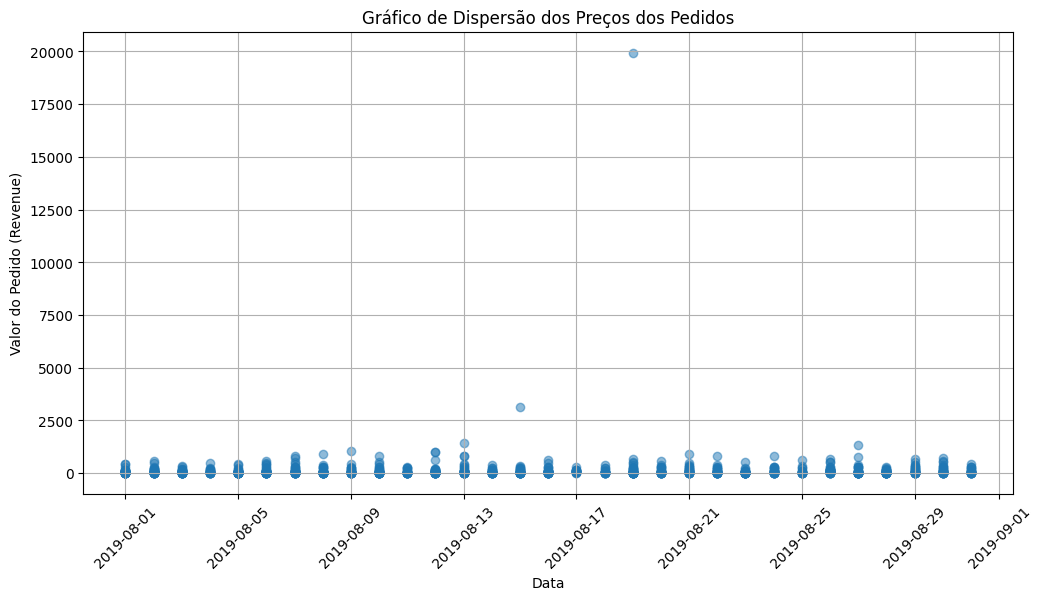

In [44]:
# Criando o gráfico de dispersão dos preços dos pedidos
plt.figure(figsize=(12, 6))
plt.scatter(orders_cleaned_df["date"], orders_cleaned_df["revenue"], alpha=0.5)

plt.xlabel("Data")
plt.ylabel("Valor do Pedido (Revenue)")
plt.title("Gráfico de Dispersão dos Preços dos Pedidos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
A maior parte dos pontos está concentrada próxima do eixo inferior (entre 0 e 2.000).<br>
Isso sugere que a grande maioria dos pedidos tem valores relativamente baixos e seguem um padrão consistente.<br>
Existem alguns pontos isolados significativamente acima da maioria, indicando pedidos de valores extremamente altos.<br>
Notavelmente, há um pedido acima de 20.000 e outro na faixa dos 5.000 - 10.000.<br>
Esses pontos destoam completamente do restante da distribuição e podem ser considerados outliers.<br>
Se esses pedidos estiverem concentrados no Grupo B, eles podem estar inflacionando a receita acumulada e o tamanho médio do pedido, distorcendo as conclusões do teste.<br><br>
Como apenas 1% dos usuários fez mais de 2 pedidos (segundo a análise dos percentis 95 e 99), isso sugere que essas compras anômalas podem ser de um pequeno grupo de usuários atípicos.<br></div>

In [45]:
# Calculando os percentis 95 e 99 dos preços dos pedidos
percentile_95_revenue = np.percentile(orders_cleaned_df["revenue"], 95)
percentile_99_revenue = np.percentile(orders_cleaned_df["revenue"], 99)

# Exibindo os resultados
print(f'Percentil 95 (limite superior esperado): {percentile_95_revenue}')
print(f'Percentil 99 (potenciais anomalias): {percentile_99_revenue}')

Percentil 95 (limite superior esperado): 414.275
Percentil 99 (potenciais anomalias): 830.3


<div class="alert alert-block alert-info">
95 porcento dos pedidos possuem um valor igual ou inferior a 414,28.<br>
Apenas 1 porcento dos pedidos ultrapassa 830,30, indicando que valores acima desse podem ser fortes anomalias.<br>
Agora, vamos calcular a significância estatística da diferença na conversão entre os grupos usando os dados brutos.<br></div>


In [46]:
# Obtendo as contagens de conversões e visitas diretamente da variável conversion_data
conversion_A = conversion_data[conversion_data["group"] == "A"]["orders"].sum()
conversion_B = conversion_data[conversion_data["group"] == "B"]["orders"].sum()

visits_A = conversion_data[conversion_data["group"] == "A"]["visits"].sum()
visits_B = conversion_data[conversion_data["group"] == "B"]["visits"].sum()

# Criando matriz de sucessos (conversões) e total de observações (visitas) para cada grupo
conversions = [conversion_A, conversion_B]
samples = [visits_A, visits_B]

# Aplicando o teste de proporção Z
stat, p_value = proportions_ztest(conversions, samples, alternative='two-sided')

# Exibindo os resultados
print(f'Valor do teste de proporção Z: {stat}')
print(f'p-valor: {p_value}')
print(f'Significância estatística (p < 0.05): {p_value < 0.05}')

Valor do teste de proporção Z: -2.3899344431697442
p-valor: 0.01685138043470311
Significância estatística (p < 0.05): True



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O teste qui quadrado é usado para variáveis categóricas, o que não é o caso: https://medium.com/@chandradip93/when-to-use-t-test-z-test-anova-and-chi-test-310fd242ca62
É importante que você leia com calma e caso tenha dúvidas, deixe uma pergunta ou tire dúvida com algum tutor.
Você precisa usar o teste de proporção z: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
</div>


<div class="alert alert-block alert-info">
<b> Realizei as alterações para o teste de proporção Z, conforme solicitado. Também refiz as conclusões e conjecturas:</b> <br><br>
Como o p-valor é menor que 0.05, podemos afirmar que há uma diferença estatisticamente significativa na taxa de conversão entre os grupos A e B.<br>
O valor negativo do teste Z indica que o grupo B teve uma taxa de conversão maior do que o grupo A, confirmando que a mudança aplicada no grupo B teve um impacto positivo.<br>
Essa diferença não é fruto do acaso, pois a probabilidade de essa diferença ser aleatória é apenas 1.68% (p-valor = 0.0168).</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>

In [47]:
# Separando os valores das receitas por grupo
revenue_A = orders_cleaned_df[orders_cleaned_df["group"] == "A"]["revenue"]
revenue_B = orders_cleaned_df[orders_cleaned_df["group"] == "B"]["revenue"]

# Aplicando o teste de Mann-Whitney para comparar as distribuições
stat, p_value = stats.mannwhitneyu(revenue_A, revenue_B, alternative="two-sided")

# Exibindo os resultados
print(f'Valor do teste de Mann-Whitney: {stat}')
print(f'p-valor: {p_value}')
print(f'Significância estatística (p < 0.05):{p_value < 0.05}')

Valor do teste de Mann-Whitney: 129041.5
p-valor: 0.8622329690015668
Significância estatística (p < 0.05):False


<div class="alert alert-block alert-info">
<b> Realizei as alterações para o teste de proporção Z, conforme solicitado. Também refiz as conclusões e conjecturas:</b> <br><br>
Como o p-valor é muito maior que 0.05, não há evidências estatísticas de que os tamanhos médios dos pedidos sejam significativamente diferentes entre os grupos.<br>
Isso significa que mesmo que um grupo tenha um ticket médio aparentemente maior, essa diferença pode ser apenas devido a variações aleatórias e não a um impacto real da mudança testada.<br><br>
Agora, vamos repetir os testes estatísticos usando os dados filtrados (sem anomalias) para verificar se os outliers estavam influenciando os resultados.
</div>

In [48]:
# Obtendo as contagens de conversões e visitas diretamente dos dados filtrados
filtered_conversion_A = filtered_orders_df[filtered_orders_df["group"] == "A"]["visitorid"].nunique()
filtered_conversion_B = filtered_orders_df[filtered_orders_df["group"] == "B"]["visitorid"].nunique()

filtered_visits_A = visits_df[visits_df["group"] == "A"]["visits"].sum()
filtered_visits_B = visits_df[visits_df["group"] == "B"]["visits"].sum()

# Criando matriz de sucessos (conversões) e total de observações (visitas) para cada grupo nos dados filtrados
filtered_conversions = [filtered_conversion_A, filtered_conversion_B]
filtered_samples = [filtered_visits_A, filtered_visits_B]

# Aplicando o teste de proporção Z para os dados filtrados
stat_filtered, p_value_filtered = proportions_ztest(filtered_conversions, filtered_samples, alternative='two-sided')

# Exibindo os resultados
print(f'Valor do teste de proporção Z (dados filtrados):{stat_filtered}')
print(f'p-valor (dados filtrados): {p_value_filtered}')
print(f'Significância estatística (p < 0.05):{p_value_filtered < 0.05}')


Valor do teste de proporção Z (dados filtrados):-2.590432913559726
p-valor (dados filtrados): 0.009585530276210223
Significância estatística (p < 0.05):True



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O teste qui quadrado é usado para variáveis categóricas, o que não é o caso: https://medium.com/@chandradip93/when-to-use-t-test-z-test-anova-and-chi-test-310fd242ca62
Você precisa usar o teste de proporção z: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
</div>



<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>

<div class="alert alert-block alert-info">
Mesmo após remover os valores atípicos, a diferença entre as taxas de conversão dos grupos A e B continua estatisticamente significativa.<br>
O p-valor ainda menor (0.0096) reforça que a diferença observada não é fruto do acaso.<br>
O grupo B apresentou uma conversão maior do que o grupo A, confirmando que a mudança aplicada no grupo B teve um impacto positivo.<br>
O fato de os resultados permanecerem significativos após remover os outliers indica que esses valores extremos não foram a causa principal da diferença na conversão.</div>

In [49]:
# Separando os valores das receitas por grupo (dados filtrados)
filtered_revenue_A = filtered_orders_df[filtered_orders_df["group"] == "A"]["revenue"]
filtered_revenue_B = filtered_orders_df[filtered_orders_df["group"] == "B"]["revenue"]

# Aplicando o teste de Mann-Whitney para comparar as distribuições (dados filtrados)
stat_filtered, p_value_filtered_revenue = stats.mannwhitneyu(filtered_revenue_A, filtered_revenue_B, alternative="two-sided")

# Exibindo os resultados
print(f'Valor do teste de Mann-Whitney (dados filtrados:{stat_filtered}')
print(f'p-valor (dados filtrados): {p_value_filtered_revenue}')
print(f'Significância estatística (p < 0.05): {p_value_filtered_revenue < 0.05}')

Valor do teste de Mann-Whitney (dados filtrados:126315.5
p-valor (dados filtrados): 0.9343289515500985
Significância estatística (p < 0.05): False


<div class="alert alert-block alert-info">
Mesmo após remover os valores anômalos, não há evidências estatísticas de que os tamanhos médios dos pedidos sejam significativamente diferentes entre os grupos.<br>
Isso confirma que a mudança testada no grupo B impactou a taxa de conversão, mas não afetou o valor médio das compras.<br>
<br>Agora, vamos tomar uma decisão final com base nos resultados do teste. </div>

# 3 - DECISÃO FINAL DO TESTE A/B


<div class="alert alert-block alert-info">
Com base nos resultados das análises estatísticas, podemos tomar uma decisão sobre o teste A/B.<br><br>
O grupo B apresentou uma taxa de conversão significativamente maior do que o grupo A (p < 0.05).<br>
Não houve diferença estatisticamente significativa no tamanho médio dos pedidos entre os grupos (p > 0.05), o que significa que os clientes compraram com maior frequência no grupo B, mas o valor médio das compras permaneceu o mesmo.<br>
A remoção dos pedidos anômalos não alterou a conclusão sobre a conversão: o grupo B ainda teve um desempenho melhor.<br>
A remoção dos outliers não influenciou o tamanho médio dos pedidos, ou seja, mesmo sem os valores extremos, os tickets médios permaneceram semelhantes.<br><br>
Podemos parar o teste e considerar o grupo B como vencedor, pois:<br>
a) A conversão do grupo B foi estatisticamente superior à do grupo A.<br>
b) O aumento na conversão pode gerar mais vendas e mais receita, mesmo que o ticket médio não tenha aumentado.<br>
c) Como o impacto já é estatisticamente significativo, não há necessidade de continuar o teste, pois há evidências suficientes para tomar uma decisão.</div>


